<a href="https://colab.research.google.com/github/rivkms/2021_sw_exam/blob/main/%EC%88%98%EC%97%85%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B6%84%EB%A5%981(%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC)%20%EA%B3%BC%EC%A0%9C%EC%A0%9C%EC%B6%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 머신러닝 프로세스



> 문제 정의 -> 데이터 수집 -> 데이터 전처리 -> 모델 학습 -> 모델 예측 및 평가



----------------
## [Live Coding] 동물 분류하기(feat. 결정트리 모델)

### 1. 문제 정의(분류 문제)
- 우리가 사용할 데이터는 동물의 특성과 동물의 종류를 담은 데이터셋으로 동물의 특성을 학습한 후 이를 통해 어떤 동물인지 예측하는 문제.
- 데이터에 대한 설명은 https://www.kaggle.com/uciml/zoo-animal-classification 에 서술되어 있다.

### 2. 데이터 수집(캐글 데이터셋 이용)

In [ ]:
# 캐글과 코랩 연동을 위한 kaggle.jason 파일(캐글-My Account에서 다운로드) 업로드
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"rivmsk","key":"44785b015bcf0f2c0006647fe333e1ed"}'}

In [ ]:
# kaggle.json 파일을 적절한 디렉토리로 이동
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 이 일어나지 않도록 함 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# zoo-animal-classification 데이터셋 다운로드
!kaggle datasets download -d uciml/zoo-animal-classification

  0% 0.00/1.85k [00:00<?, ?B/s]
100% 1.85k/1.85k [00:00<00:00, 3.05MB/s]


In [ ]:
# zip파일 압축 해제 후 현재 디렉토리의 파일 리스트 보기
!unzip zoo-animal-classification.zip
!ls

Archive:  zoo-animal-classification.zip
replace class.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace zoo.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
class.csv     kaggle.json  zoo-animal-classification.zip
diabetes.csv  sample_data  zoo.csv


### 3. 데이터 전처리

In [ ]:
import numpy as np
import pandas as pd

# csv 파일을 pandas dataframe으로 읽기
data = pd.read_csv('zoo.csv')

# 상위 5개 행 출력
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
# 데이터 정보 요약
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

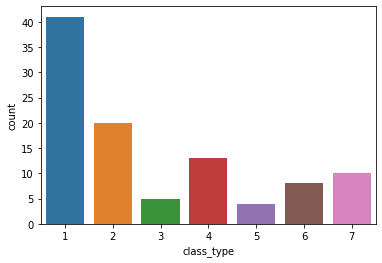

In [ ]:
# 클래스 별 데이터 개수 확인
import seaborn as sns
%matplotlib inline

sns.countplot(data=data, x="class_type")
data.loc[:,'class_type'].value_counts()

In [ ]:
# 머신러닝 학습에 사용되지 않는 열 삭제
# inplace는 실제로 삭제하라는 뜻
data.drop('animal_name', axis=1, inplace=True)
data.head(3)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4


In [ ]:
# 피처 데이터 세트 x, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 훈련 데이터셋과 테스트 데이터셋 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=156, stratify=y)


In [ ]:
# 훈련데이터 x_train 값 확인
x_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
61,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1


In [ ]:
# 훈련데이터 y_train 값 확인
y_train.head()

71    2
96    1
4     1
61    4
92    4
Name: class_type, dtype: int64

### 4. 모델 학습

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classification
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 5. 모델 예측 및 평가

In [ ]:
# 예측값 확인
pred = dt.predict(x_test)
type(pred)
pred[:5]

array([1, 2, 2, 2, 4])

In [ ]:
from sklearn.metrics import accuracy_score

# 정확도 출력
accuracy_score(y_test, pred)

0.9047619047619048

--------
## 2. 분류 by 머신러닝
### 2-1. 분류문제
분류는 레이블이 달린 학습 데이터를 학습한 후 새롭게 주어지는 데이터가 어느 그룹에 속하지는지 찾아내는 것
- 내일 날씨는? 맑음, 흐림
- A팀과 B팀 경기에서 어느 팀이 이길까?

### 2-2. 머신러닝으로 구현하는 분류
- **결정트리(Desicion Tree)** : 데이터 균일도에 따른 규칙 기반 모델
- 최소 근접 알고리즘(KNN, K Nearest Neighbor) : 근접 거리를 기준으로 하는 모델
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/330px-KnnClassification.svg.png' width=200>

- 서포트 벡터 머신(SVM, Support Vector Machine) : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾음
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/1024px-Svm_separating_hyperplanes.png' width=200>

- 로지스틱 회귀(Logistic Regression) : 독립변수와 종속변수의 선형 관계성에 기반. 분류 알고리즘 중에서 성능이 좋음. 
<img src='https://t1.daumcdn.net/cfile/tistory/99F325485C7B76BC2B' width=400>


- 나이브 베이즈(Naive Bayes) : 분류 문제에 베이즈 이론을 접목한 알고리즘. 범주형 데이터에 사용하는 알고리즘이며 텍스트 분류에 많이 사용됨. 독립변수가 많을 때 간단하게 계산.
- 앙상블(Ensemble) : 서로 다른(또는 같은) 여러 머신러닝 모델을 결합
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FDdB4X%2FbtqDDvpfx5p%2FV8AtWq6MT6tmTktleKqjPk%2Fimg.png' width=300>

- 심층신경망(Deep Neural Network) : 최적의 w와 b를 학습

## 3. 결정 트리(Decision Tree) 개요
결정 트리(Decision Tree)는 ML 알고리즘 중에서 직관적으로 이해하기 쉬운 알고리즘이며 분류/회귀에 모두 적용할 수 있다. 데이터에 내재된 패턴을 학습한 후 트리(Tree) 기반 형태로 규칙을 나열한 것이다. 마치 if/else를 자동으로 찾아내 해결하는 것과 같다. 따라서 데이터의 어떤 기준으로 규칙을 만드는가가 알고리즘의 성능을 좌우한다. 

<img src='https://miro.medium.com/max/1430/1*rSQIIAboJftqAv_BReNipg.png' width=500>

사이킷런의 결정트리 알고리즘은 노드에서 균일도가 높은 데이터셋을 먼저 선택하도록 규칙조건을 만드는데 이때 기준이 되는 것이 지니계수이다.
> 지니계수(Gini): 원래 경제학의 불평등 지수로 0이 가장 평등(다양성 보장)하고 1로 갈수록 불평등. 머신러닝에서는 한 집단이 다양한 클래스로 구성되면 평등하다고 보고 0으로 표현하며 1로 갈수록 균일도가 높아져 적은 클래스로 구성된다는 것을 의미한다. 


### 3-1. 결정 트리의 특징
- 장점
  - 알고리즘이 쉽고 직관적이다
  - 시각화도 가능하다
  - 데이터의 균일도가 보다 중요해서 특별한 경우 외에는 스케일링같은 전처리작업이 필요없다 
- 단점
  - 계층적 구조로 인해 중간에 에러가 발생하면 아래 단계로 계속 전파
  - 학습 데이터의 미세한 변동에도 최종 결과에 크게 영향
  - 과적합으로 인한 성능 저하가 가장 큰 단점
    (성능의 일부를 포기하고 트리의 크기를 제한하는 것이 오히려 튜닝에 도움된다)




### 3-2. 결정 트리 파라미터
사이킷런은 결정트리 알고리즘을 구현한 DecisionTreeClassifier(분류)클래스를 제공한다.

- min_samples_split: 기본값=2. 노드 분할 최소 샘플수로 과적합 제어에 활용. 
- min_samples_leaf: 말단 노드가 되기 위한 최소 샘플수. 과적합 제어에 활용. 비대칭적 데이터의 경우 특정 데이터의 클래스가 극도로 작을 수 있으므로 이 경우 작게 설정할 필요.
- max_features: 최적 분할을 위해 고려할 최대 피처 개수. int로 지정하면 대상 피처의 개수, float로 지정하면 전체 피처 중 대상 피처의 퍼센트. 'None'은 전체 피처 선정
- max_depth: 기본값=None. 트리의 최대 깊이 설정. None은 완벽하게 클래스 결정 값이 될때까지 깊이를 계속 키우며 분할하거나 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴
- max_leaf_nodes: 말단 노드(leaf)의 최대 개수

-----------------
## 4. 결정 트리로 분류 문제 해결하기

### 4-1. 문제 정의(분류 문제)

### 4-2. 데이터 수집(캐글 데이터셋 이용)

In [ ]:
# Pima Indian Diabetes 데이터셋 다운로드
! kaggle datasets download -d uciml/pima-indians-diabetes-database

In [ ]:
# zip파일 압축 해제 후 현재 디렉토리의 파일 리스트 보기
!unzip pima-indians-diabetes-database.zip
!ls

### 4-3. 데이터 전처리

In [ ]:
# csv 파일을 pandas dataframe으로 읽기
diabetes_data = pd.read_csv('diabetes.csv')

# Outcome(당뇨:1 당뇨아님:0)행의 value를 count
print(diabetes_data['Outcome'].value_counts())

# 상위 5개 행을 출력
diabetes_data.head(5)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 데이터 정보 요약
diabetes_data.info( )

In [ ]:
# 피처 데이터 세트 x, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
x = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 156, stratify=y)

#### 간편하게 train/test 분리: train_test_split
훈련한 모델의 성능을 평가하기 위해 전체 데이터를 훈련 데이터셋과 테스트 데이터셋을 나눈다. 훈련 데이터셋은 모델 훈련에 사용되며, 테스트 데이터셋으로 모델을 평가하게 된다.

- train_test_split 파라미터
  - test_size: 테스트 셋 구성의 비율을 나타냅니다. train_size의 옵션과 반대 관계에 있는 옵션 값이며, 주로 test_size를 지정해 줍니다. 0.2는 전체 데이터 셋의 20%를 test (validation) 셋으로 지정하겠다는 의미입니다. default 값은 0.25 입니다.
  - shuffle: default=True 입니다. split을 해주기 이전에 섞을건지 여부입니다. 보통은 default 값으로 놔둡니다.
  - random_state: 세트를 섞을 때 해당 int 값을 보고 섞으며, 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있습니다.
  - stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.
- train_test_split 리턴값
 - X_train, X_test, Y_train, Y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.
  - X_train, X_test : arrays에 레이블 없이 데이터만 넣었을 경우의 반환


### 4-4. 모델 학습

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classification
dt = DecisionTreeClassifier() 

dt.fit(x_train, y_train)
dt_prediction = dt.predict(x_test)

### 4-5. 모델 예측 및 평가

In [ ]:
from sklearn.metrics import accuracy_score

# 정확도 출력
accuracy_score(y_test, dt_prediction)

------
### 모델 평가 지표
머신러닝은 여러 가지 지표로 예측 성능을 평가할 수 있다. 분류는 일반적으로 정확도(Accuracy)로 평가하고 회귀는 보통 오차의 평균값(MSE)으로 한다. 회귀의 평가는 회귀 수업에서 다룬다. 

#### 1) 분류결과표(Confusion Matrix, 오차행렬)
<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width=400px>
<img src="https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg" width=400px> 

분류결과표는 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과를 표나 나타낸 것이다. 정답 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타낸다.

#### 2) 정확도(Accuracy)

${accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN} $

정확도는 전체 샘플 중 맞게 예측한 샘플 수의 비율을 뜻한다. 높을수록 좋은 모형이다. 일반적으로 학습에서 최적화 목적함수로 사용된다. 하지만 이진분류의 경우 정확도가 왜곡된 평가를 할 수 있기 때문에 주의해야 한다. 예를 들어, 100개의 금융거래 데이터 중 사기거래 데이터(양성 클래스)가 10개 뿐일 때, 만약 무조건 정상거래(음성 클래스)라고 예측하는 ML모델의 경우라도 정확도는 90%가 나오게 된다. 


#### 3) 정밀도(Precision)

${precision} = \dfrac{TP}{TP + FP}$

정밀도는 양성 클래스에 속한다고 예측한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율을 말한다. 높을수록 좋은 모형이다. 정밀도가 중요한 예로 스팸메일의 경우, 실제 스팸메일(1)을 모델이 일반메일($\widehat{0}$)로 판단하면 불편함을 느끼는 정도지만, 실제 일반메일(0)을 모델이 스팸($\widehat{1}$)이라고 판단하면 메일을 아예 받지 못해 업무에 차질이 생길 수 있다.


#### 4) 재현율(Recall)

${recall} = \dfrac{TP}{TP + FN}$

재현율은 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 예측한 표본의 수의 비율을 뜻한다. 높을수록 좋은 모형이다. TPR(true positive rate) 또는 민감도(sensitivity)라고도 한다. 재현율이 중요한 예로 사기거래 검출의 경우, 실제 사기거래(1)를 일반거래($\widehat{0}$)로 판단하면 중대한 문제가 생기는 경우이다.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# 오차 행렬과 평가 지표 출력
print('오차 행렬\n', confusion_matrix(y_test, dt_prediction))
print('\n평가 지표\n', classification_report(y_test, dt_prediction))

### 수고했습니다.



###파마인디언 딥러닝 과제


In [ ]:
import pandas as pd
df=pd.read_csv('pima-indians-diabetes.csv',
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", 
                        "BMI", "pidigree", "age", "class"])
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pidigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pidigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pidigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df[['pregnant', 'class']].groupby(["pregnant"],as_index=False).mean().sort_values(by='pregnant', ascending=True)
#df에서 pregnant와 class를 끌어와 groupby(새로운 그룹을 만듬)하고 
#as_index로 새로운 index를 만든 뒤 이를 평균을 내고 pregnant를 기준으로 오름차순으로 구성

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

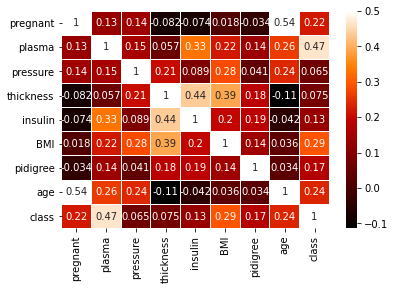

In [ ]:
sns.heatmap(df.corr(), linewidths=0.1,vmax=0.5, cmap=plt.cm.gist_heat, linecolor= "white", annot=True)

<function matplotlib.pyplot.show>

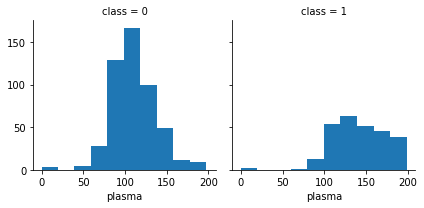

In [ ]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

dataset=np.loadtxt('pima-indians-diabetes.csv',delimiter=",")
x=dataset[:,0:8]
y=dataset[:,8]

model = Sequential()
model.add(Dense(12, input_dim=8,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(x,y,epochs=200, batch_size=10)
print("\n Accuracy:%.4f" % (model.evaluate(x,y)[1]))

Epoch 1/200
77/77 [==============================] - 1s 2ms/step - loss: 12.0693 - accuracy: 0.6273
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 5.7426 - accuracy: 0.6227
Epoch 3/200
77/77 [==============================] - 0s 2ms/step - loss: 3.2875 - accuracy: 0.5365
Epoch 4/200
77/77 [==============================] - 0s 2ms/step - loss: 1.6549 - accuracy: 0.5589
Epoch 5/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8960 - accuracy: 0.4802
Epoch 6/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8696 - accuracy: 0.5314
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7652 - accuracy: 0.6588
Epoch 8/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7709 - accuracy: 0.6785
Epoch 9/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7154 - accuracy: 0.6615
Epoch 10/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.6699
Epoch 11